In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam

import nltk
from nltk.corpus import stopwords

import numpy as np 
import matplotlib.pyplot as plt
import urllib
import random

In [2]:
url = "https://raw.githubusercontent.com/ardauzunoglu/edebizeka/creating-data-sets/raw-data/orhan-veli-kanik.txt"

nltk.download('stopwords')
StopWords = stopwords.words('turkish')
punctuation = ["!", "#", "$", "%", "&", "'", "(", ")", "*", "+", ",", "-", ".", "/", ":", ";", "<", "=", ">", "?", "@", "[", "^", "_", "`", "{", "|", "}", "~", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]

additions = ["mi", "mu", "mı", "mü"]
for addition in additions:
  StopWords.append(addition)

data_file = urllib.request.urlopen(url)
data = ""

cleaned_stopwords = []

for line in data_file:
  line = line.decode("utf-8").replace("\r", "").replace("\n", "")
  cleaned_line = ""
  
  for char in line:
    if char not in punctuation:
      cleaned_line += char

  for word in cleaned_line.split():
    if word.lower() not in StopWords:
      data += word
      data += " "

    else:
      if word not in cleaned_stopwords:
        cleaned_stopwords.append(word)


  data += "\n"

print(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Ağlasam sesimi duyar mısınız 
Mısralarımda 
Dokunabilir misiniz 
Göz yaşlarıma ellerinizle 
Bilmezdim şarkıların kadar güzel 
Kelimelerinse kifayetsiz olduğunu 
derde düşmeden önce 
Bir yer var biliyorum 
şeyi söylemek mümkün 
Epeyce yaklaşmışım duyuyorum 
Anlatamıyorum 

İstanbulu dinliyorum gözlerim kapalı 
Önce hafiften bir rüzgar esiyor 
Yavaş yavaş sallanıyor 
Yapraklar ağaçlarda 
Uzaklarda uzaklarda 
Sucuların durmayan çıngırakları 
İstanbulu dinliyorum gözlerim kapalı 
İstanbulu dinliyorum gözlerim kapalı 
Kuşlar geçiyor derken 
Yükseklerden sürü sürü çığlık çığlık 
Ağlar çekiliyor dalyanlarda 
Bir kadının suya değiyor ayakları 
İstanbulu dinliyorum gözlerim kapalı 
İstanbulu dinliyorum gözlerim kapalı 
Serin serin Kapalıçarşı 
Cıvıl cıvıl Mahmutpaşa 
Güvercin dolu avlular 
Çekiç sesleri geliyor doklardan 
Güzelim bahar rüzgarında ter kokuları 
İstanbulu dinliyo

In [3]:
tokenizer = Tokenizer()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'bir': 1, 'kadar': 2, 'güzel': 3, 'gün': 4, 'ben': 5, 'değil': 6, 'var': 7, 'böyle': 8, 'deniz': 9, 'artık': 10, 'zaman': 11, 'içinde': 12, 'beni': 13, 'sen': 14, 'başka': 15, 'benim': 16, 'gelir': 17, 'birdenbire': 18, 'dolu': 19, 'ey': 20, 'mavi': 21, 'kapalı': 22, 'bütün': 23, 'öyle': 24, 'yine': 25, 'karşı': 26, 'oldu': 27, 'akşam': 28, 'i̇stanbulu': 29, 'dinliyorum': 30, 'gözlerim': 31, 'bana': 32, 'onun': 33, 'kiminiz': 34, 'sizin': 35, 'bedava': 36, 'ah': 37, 'gece': 38, 'olur': 39, 'bak': 40, 'hoş': 41, 'sabah': 42, 'insan': 43, 'onu': 44, 'fakat': 45, 'güneş': 46, 'yok': 47, 'sonra': 48, 'biliyorum': 49, 'kuşlar': 50, 'bahar': 51, 'ay': 52, 'gel': 53, 'seni': 54, 'giden': 55, 'dünya': 56, 'yalnız': 57, 'hala': 58, 'üzerine': 59, 'eski': 60, 'beyaz': 61, 'doğuyor': 62, 'yağmur': 63, 'yaz': 64, 'aynı': 65, 'şarkı': 66, 'bin': 67, 'havalarda': 68, 'şiir': 69, 'senin': 70, 'dersin': 71, 'ölüm': 72, 'sesi': 73, 'son': 74, 'çocuk': 75, 'yolculuk': 76, 'rüzgar': 77, 'vakti': 78, 'al

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 75, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softplus'))
adam = Nadam(lr=0.0125)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=98, verbose=1)
#print model.summary()
print(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/98
128/128 [==============================] - 10s 10ms/step - loss: 8.0536 - accuracy: 0.0186
Epoch 2/98
128/128 [==============================] - 1s 9ms/step - loss: 7.2692 - accuracy: 0.0296
Epoch 3/98
128/128 [==============================] - 1s 9ms/step - loss: 5.9844 - accuracy: 0.0625
Epoch 4/98
128/128 [==============================] - 1s 9ms/step - loss: 4.4268 - accuracy: 0.1434
Epoch 5/98
128/128 [==============================] - 1s 9ms/step - loss: 2.8102 - accuracy: 0.3476
Epoch 6/98
128/128 [==============================] - 1s 9ms/step - loss: 1.5520 - accuracy: 0.6160
Epoch 7/98
128/128 [==============================] - 1s 9ms/step - loss: 0.8764 - accuracy: 0.7677
Epoch 8/98
128/128 [==============================] - 1s 9ms/step - loss: 0.6056 - accuracy: 0.8200
Epoch 9/98
128/128 [==============================] - 1s 9ms/step - loss: 0.4673 - accuracy: 0.8405
Epoch 10/98
128/128 [==============================] - 1s 9ms/step - loss: 0.4085 - accuracy: 0.84

In [6]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

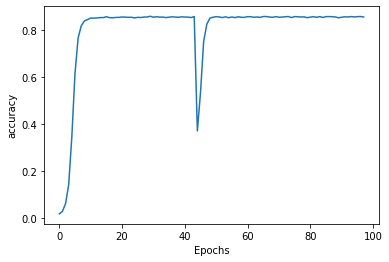

In [7]:
plot_graphs(history, 'accuracy')


In [8]:
def calculate_word_length(corpus):
  length_dict = {
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0,
    10:0,
    11:0,
    12:0
  }
  line_count = 0
  for line in corpus:
    line_count += 1
    word_length = len(line.split())
    if (word_length <= 12) and (word_length != 0):
      length_dict[word_length] += 1

  return length_dict

def calculate_line_length(data):
  length_dict = {
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0,
    10:0,
    11:0,
    12:0,
    13:0,
    14:0,
    15:0,
    16:0,
    17:0,
    18:0,
    19:0,
    20:0
  }
  poem_count = 0
  for poem in data.split("\n\n"):
    poem_count += 1
    line_length = len(poem.split("\n"))
    if (line_length <= 20) and (word_length != 0):
      length_dict[line_length] += 1

  return length_dict

def generate_poem(next_words, seed_text, word_length_dict, line_length_dict):
  poem = ""
  line_length_dict_length = 0
  word_length_dict_length = 0
  initial_seed_text_word_count = len(seed_text.split())
  tour = 0

  for key in word_length_dict.keys():
    word_length_dict_length += word_length_dict[key]

  while len(seed_text.split()) < next_words:
    dict_values_sum = 0
    key = 1
    random_num = random.randint(0, word_length_dict_length)

    while random_num > dict_values_sum:
      dict_values_sum += word_length_dict[key]
      key += 1

    line_length = list(word_length_dict.keys())[key]

    if (initial_seed_text_word_count != 0) or (tour < 2):

      for _ in range(line_length - initial_seed_text_word_count):

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
          if (index == predicted) and (word != seed_text.split()[-1]):
            output_word = word
            break

        seed_text += " "
        seed_text += output_word

      seed_text += "\n"
      initial_seed_text_word_count = 0
      tour += 1

    else:

      last_line_of_poem = seed_text.split("\n")[-2] + "\n"
      
      for _ in range(line_length):
        token_list = tokenizer.texts_to_sequences([last_line_of_poem])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
          if (index == predicted) and (word != seed_text.split()[-1]):
            output_word = word
            break

        seed_text += " "
        seed_text += output_word
        last_line_of_poem += " "
        last_line_of_poem += output_word

      seed_text += "\n"
      tour += 1

  seed_text = seed_text.strip()
  seed_text = seed_text.split("\n")

  for line in seed_text:

    if line[0] != "i":
      poem += line.strip().capitalize()
      poem += "\n"

    else:
      line[0] = "İ"
      poem += line.strip()
      poem += "\n"

  line_num = len(poem.split("\n")) - len(poem.split("\n\n"))
  current_line_num = len(poem.split("\n"))

  while current_line_num <= line_num:
    random_num = random.randint(0, line_length_dict_length)
    dict_values_sum = 0
    key = 1

    while random_num > dict_values_sum:
      dict_values_sum += line_length_dict[key]
      key += 1

    poem_length = list(line_length_dict.keys())[key]

    poem = str(poem.split("\n")[:poem_length+1]) + "\n" + str(poem.split("\n")[poem_length:])

  return poem

In [10]:
next_words = int(input("Kelime sayısı: "))
seed_text = str(input("Başlangıç: "))

word_length_dict = calculate_word_length(corpus)
line_length_dict = calculate_word_length(data)

poem = generate_poem(next_words, seed_text, word_length_dict, line_length_dict)
print(poem)
print(len(poem.replace("\n\n", " ").replace("\n", " ").split()))

Kelime sayısı: 150
Başlangıç: Selam ve saz ayrılmaz bir ikili
Selam ve saz ayrılmaz bir ikili
Alem doğdu yine giden günün ardından
Sulara dalan şarkılarda doğan pencereden şehnameleşir
Pencereden ardından aşıkane hali kapısından
Maden yollara yerle ilk toprakta
Sallanan ilk acı ayrılmak beraber
Biliyorum pencereden üzerinden okunan
Işığında nurünnisa semadan tepesine uykudayken
Saz
Yazma kokusunda köşkümün saz ay doğuyor
Geceleri mavi
Bir gökyüzü titrerdi bir sesin
Var ağlayamam rüyalarımda geceleri kapısını geceleri akşama
Ilk hece hasretimi dut düşünceleri
Itidal kılan ruhun olunca içinizde fıstıkların
Değen arzu dolu dudakları
Kan damların bana göründüğün üzerinde
Sallanan var avutacak gönlümü içinde
Çoktur sarı aşıkane şarkılarda işte beden
Var esvaplarım ilk içinde
Sesiz çağlardı ilk hece acı ol
Yeşil

Sihrini bir alemden deyince üzerinde
Havalarda kalksam üzerinde
Kıyı içinde biliyorum etmesin akar fıstıkların
Şehnameleşir kokudan dair doğan
Gördüm olacaktım var türküsünü işte gü